In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('creditcard.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28).

In [3]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
print(df.shape)

(284807, 31)


In [5]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


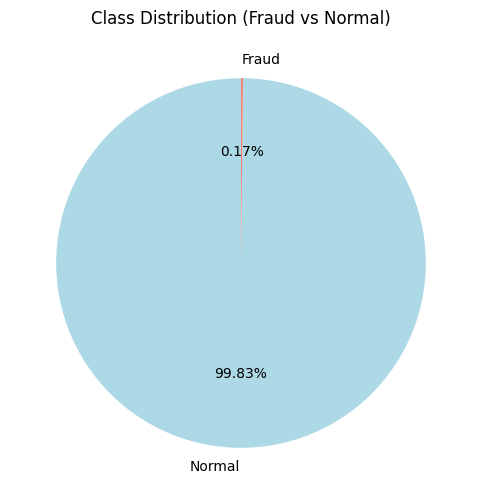

In [7]:
# Pie chart of Class (Fraud vs Normal)
labels = ['Normal', 'Fraud']
sizes = df['Class'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Class Distribution (Fraud vs Normal)')
plt.show()

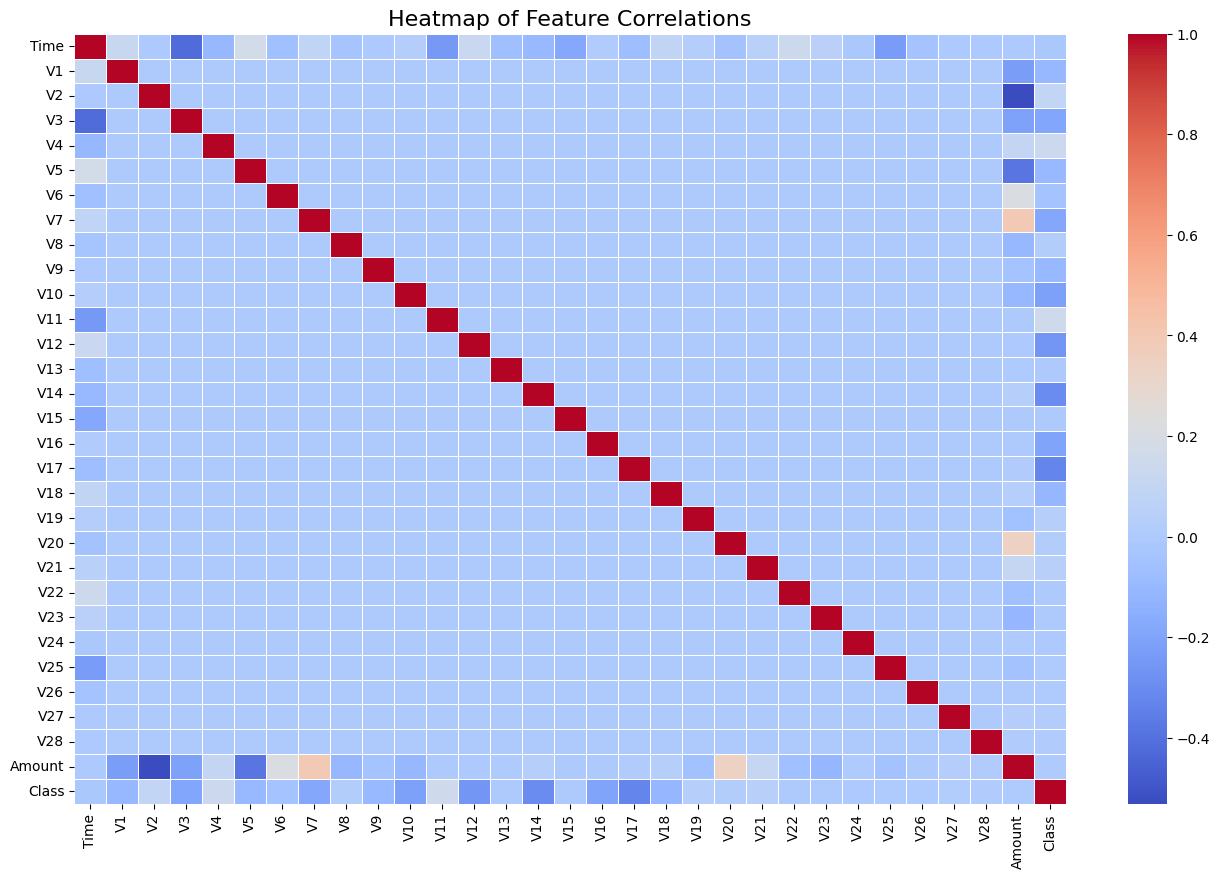

In [8]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Feature Correlations", fontsize=16)
plt.show()

C:\Users\kandu\AppData\Local\Temp\ipykernel_23036\1524818109.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col] for col in v_features], labels=v_features)


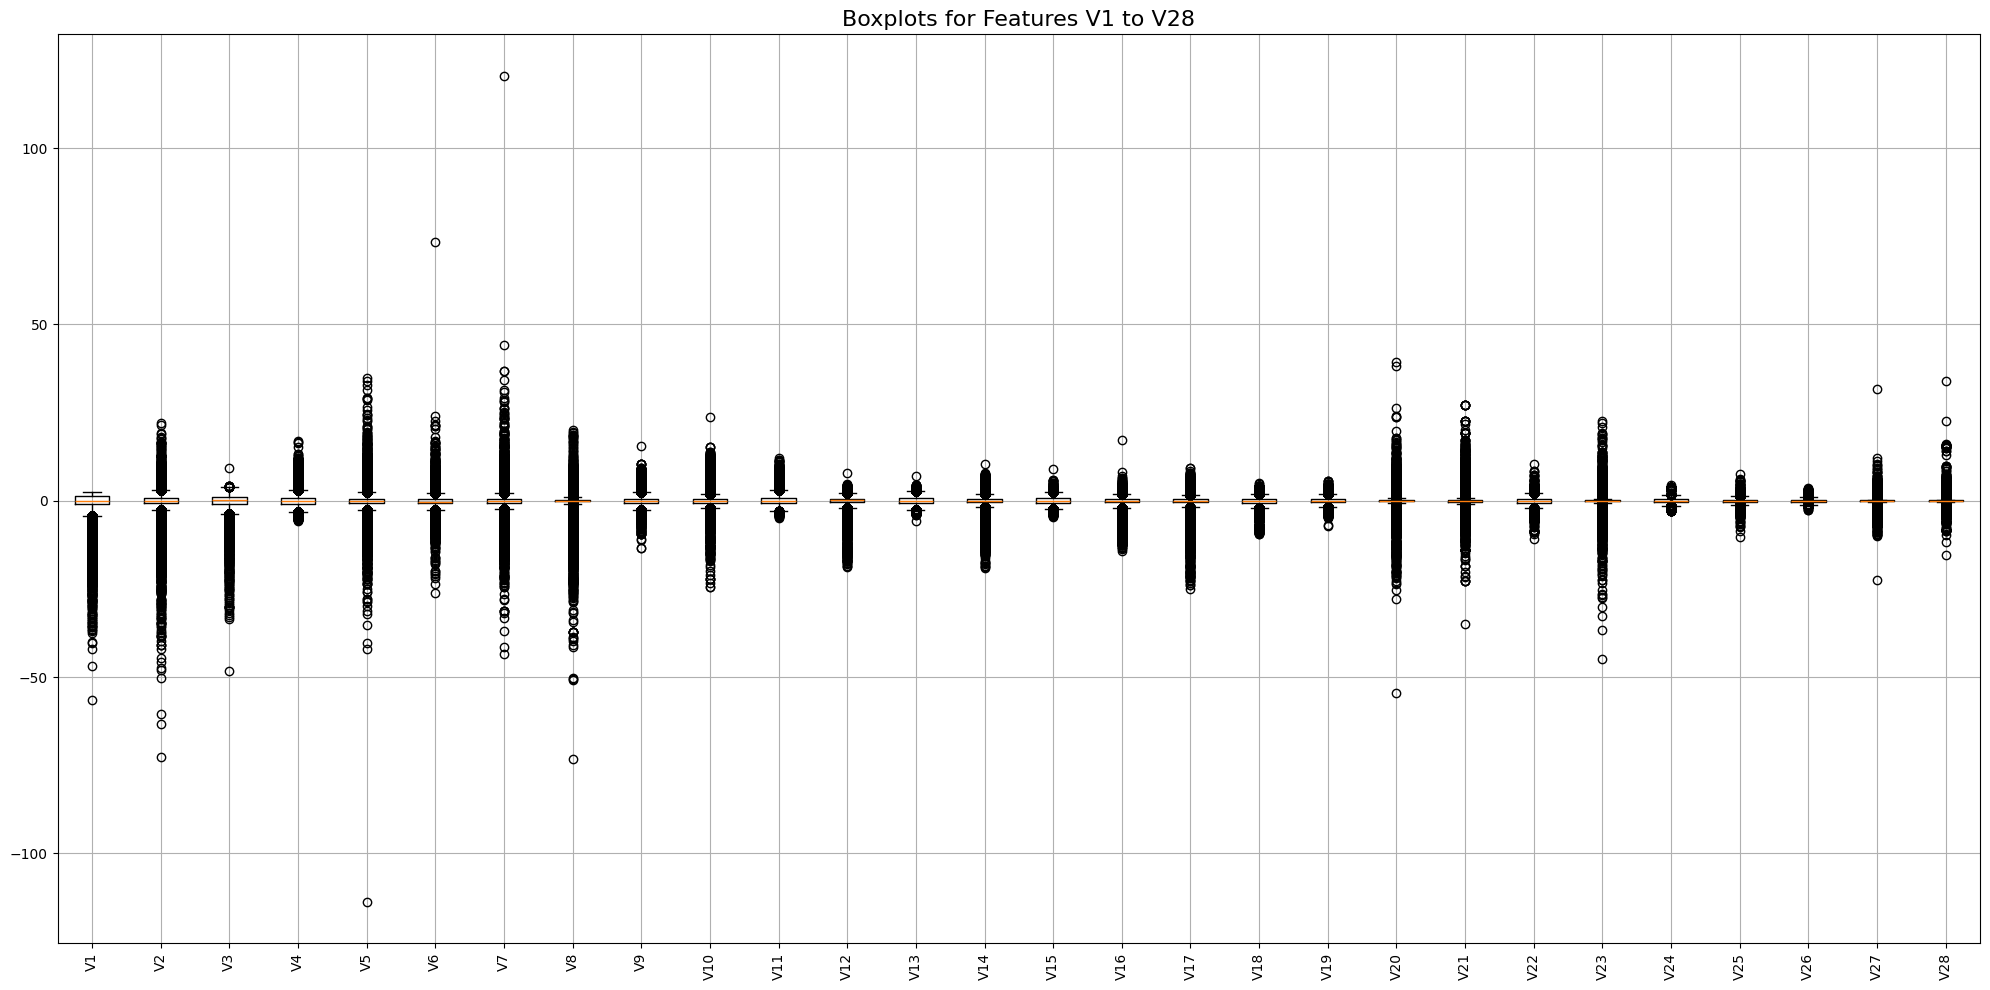

In [9]:
# Plot boxplots for features V1 to V28
v_features = [f'V{i}' for i in range(1, 29)]

plt.figure(figsize=(20, 10))
plt.boxplot([df[col] for col in v_features], labels=v_features)
plt.title("Boxplots for Features V1 to V28", fontsize=16)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
df_copy = df.copy()
scaler = StandardScaler()
df_copy['Amount_Scaled'] = scaler.fit_transform(df_copy[['Amount']])
df_copy['Time_Scaled'] = scaler.fit_transform(df_copy[['Time']])
df_copy.drop(['Amount', 'Time'], axis=1, inplace=True)
X = df_copy.drop('Class', axis=1)
y = df_copy['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (227845, 30)
Test set shape: (56962, 30)


In [11]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


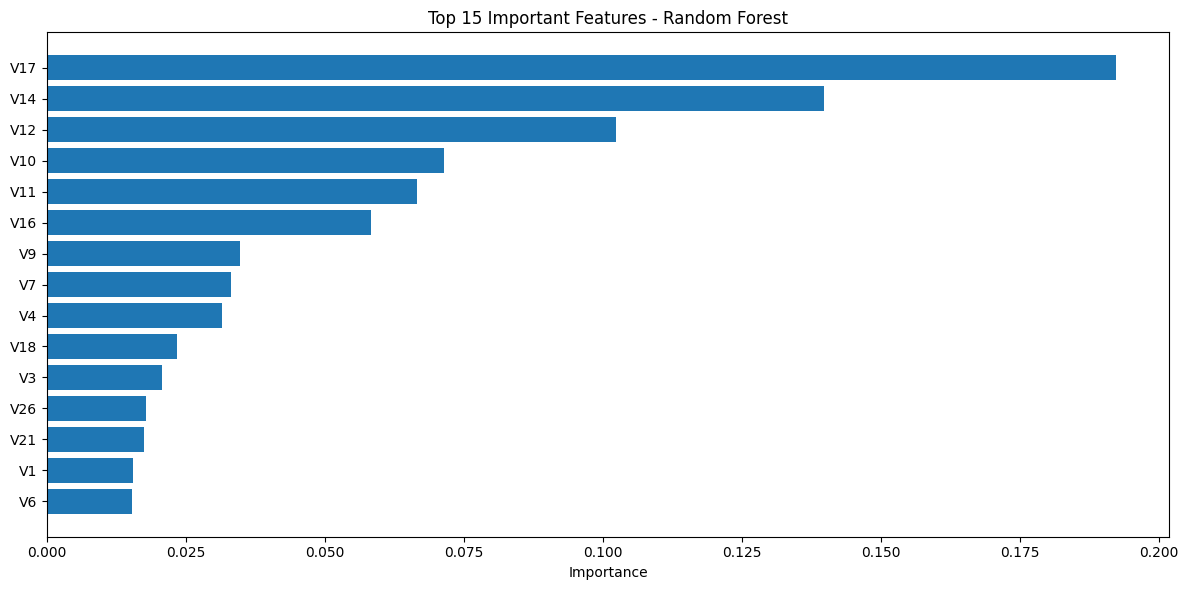

In [12]:
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12,6))
plt.barh(feature_importance_df['Feature'][:15][::-1], feature_importance_df['Importance'][:15][::-1])
plt.xlabel('Importance')
plt.title('Top 15 Important Features - Random Forest')
plt.tight_layout()
plt.show()

In [13]:
# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Naive Bayes': {
        # GaussianNB has no tunable hyperparameters but included for uniformity
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0]
    }
}

# Use selected features with importance greater than 0.05 only to prevent overfitting
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.05]['Feature'].tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Use selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Perform Grid Search for each model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_models = {}

for name in models:
    print(f"\n Tuning {name}...")
    grid = GridSearchCV(models[name], param_grids[name], scoring='f1', cv=cv, n_jobs=-1, verbose=1)
    grid.fit(X_train_selected, y_train)

    best_model = grid.best_estimator_
    best_models[name] = best_model

    print(f"Best Parameters for {name}: {grid.best_params_}")
    y_pred = best_model.predict(X_test_selected)
    print(classification_report(y_test, y_pred))

C:\Users\kandu\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



 Tuning Logistic Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.59      0.69        98

    accuracy                           1.00     56962
   macro avg       0.91      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962


 Tuning K-Nearest Neighbors...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters for K-Nearest Neighbors: {'n_neighbors': 7, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     

C:\Users\kandu\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\kandu\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.83      0.89        98

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



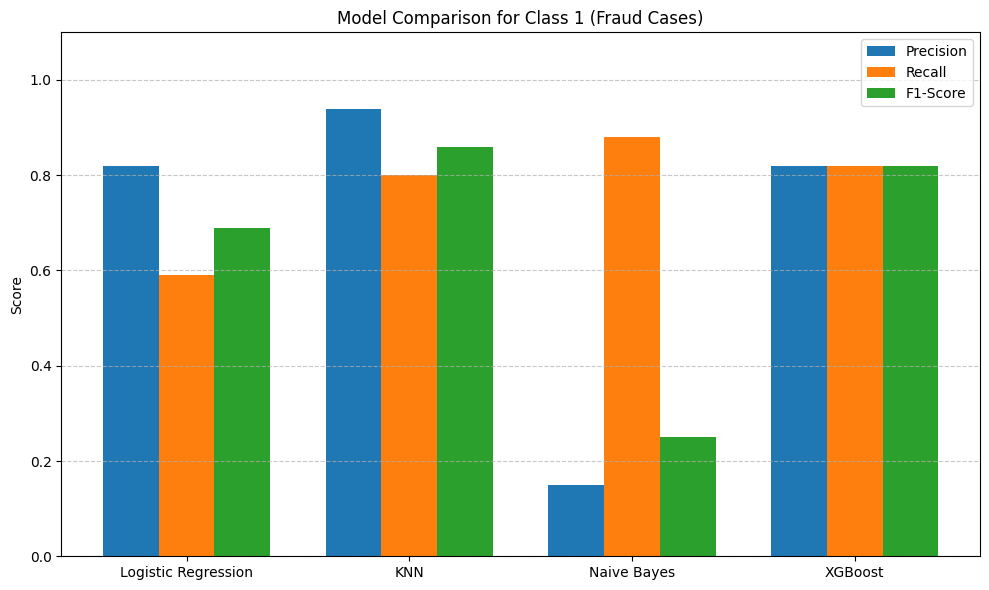

In [14]:
# Define metrics manually based on output
models = ['Logistic Regression', 'KNN', 'Naive Bayes', 'XGBoost']
precision = [0.82, 0.94, 0.15, 0.82]
recall =    [0.59, 0.80, 0.88, 0.82]
f1_score =  [0.69, 0.86, 0.25, 0.82]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1_score, width, label='F1-Score')

plt.ylabel('Score')
plt.title('Model Comparison for Class 1 (Fraud Cases)')
plt.xticks(x, models)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Model Comparison for Minority Class (Class 1)

Comparison for *Class 1* (fraud cases) across four tuned classifiers:

- **Logistic Regression**
- **K-Nearest Neighbors (KNN)**
- **Naive Bayes**
- **XGBoost**

This comparison is essential for imbalanced classification problems, where detecting the rare class (fraud) is critical.

- **Precision**: Proportion of predicted frauds that are truly fraud.
- **Recall**: Proportion of actual frauds correctly detected.
- **F1-Score**: Harmonic mean of precision and recall.

📝 **Insights**:
- **XGBoost** offers the best **balance** between precision and recall, making it the most reliable choice.
- **KNN** yields **highest precision**, reducing false alarms but may miss some fraud cases.
- **Naive Bayes** achieves **high recall** but poor precision, leading to many false positives.
- **Logistic Regression** is simple and interpretable but struggles with recall.



### XGBoost: Model Analysis and Real-World Implications

#### Results Summary
XGBoost achieved the **best overall performance** for the minority class (fraud cases), with:
- **Precision**: 0.82
- **Recall**: 0.82
- **F1-Score**: 0.82

This indicates that the model is both accurate in predicting fraud and effective in capturing most actual fraud cases — a strong balance.

#### Strengths
- **High performance on imbalanced data**: Excellent at detecting rare cases without excessive false alarms.
- **Robust to overfitting**: Through regularization and ensemble learning.
- **Scalable and fast**: Suitable for large datasets with high dimensionality.
- **Supports feature importance**: Helps understand what influences predictions, aiding model explainability.

#### Limitations
- **Less interpretable** than simpler models like Logistic Regression.
- **Requires tuning**: Performance depends heavily on hyperparameter optimization.
- **Computationally intensive**: May be slower than basic models in training and deployment without proper resources.

#### Real-World Applications and Implications
XGBoost is **highly suitable for fraud detection systems** in banking and e-commerce because it:
- Detects fraudulent transactions with high accuracy, reducing financial loss.
- Maintains a low false positive rate, improving customer experience.
- Can be retrained regularly to adapt to evolving fraud patterns.

By balancing **precision and recall**, XGBoost ensures that businesses:
- **Catch more fraud** while **avoiding unnecessary alerts**.
- **Prioritize high-risk transactions** for manual review.
- **Build trust** with customers through secure and responsive systems.

In production, XGBoost can be integrated into real-time monitoring pipelines to flag suspicious behavior and trigger automated or human responses.